<a href="https://colab.research.google.com/github/Epvargas/Elyse-Exploratory-Data-Analysis/blob/main/Elyse_EDA_Scripts_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Simple Descriptive Analysis

#  **Bar Plots**

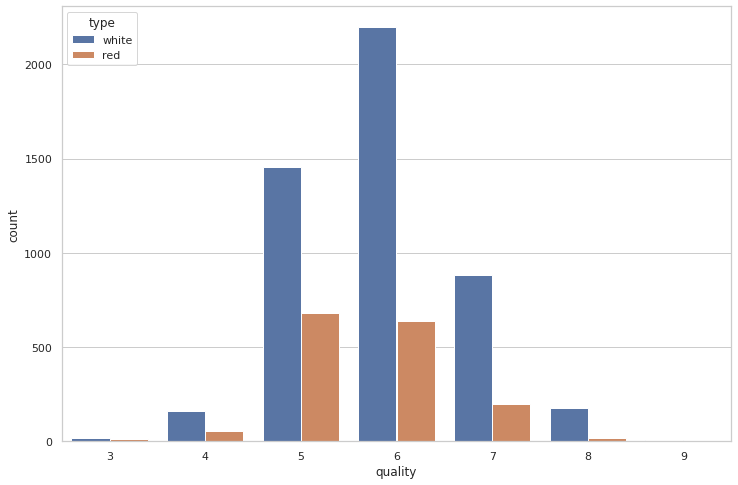

In [31]:
# Bar Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Enlarge the plot
plt.figure(figsize=(12,8))

sns.countplot(x='quality', data=df, hue='type')

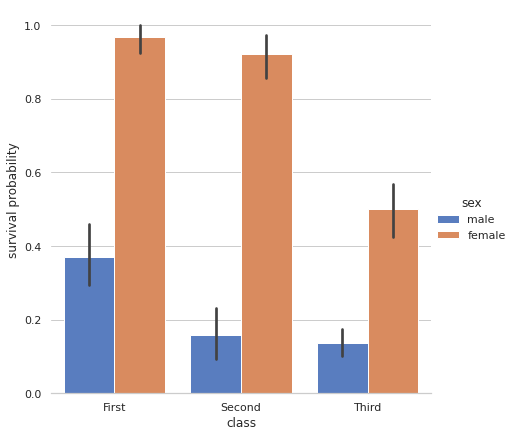

In [32]:
# Titanic Example
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

#  **Density Plots**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


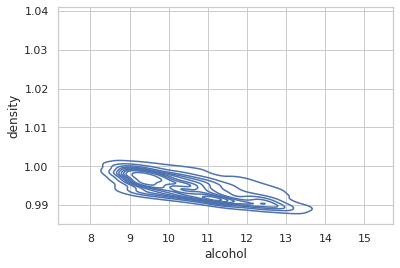

In [33]:
# Density Plot
sns.kdeplot(df.alcohol, df.density)

#  **Distribution Plots**

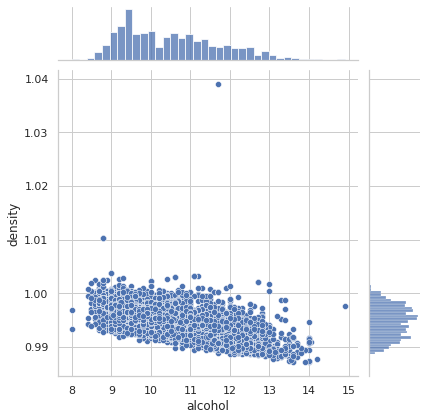

In [34]:
# Joint Distribution Plot

sns.jointplot(x='alcohol', y='density', data=df)

# Factor Plots and Bee Swarm Plots

Factor plots allow us to create separate plots by categorical classes.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


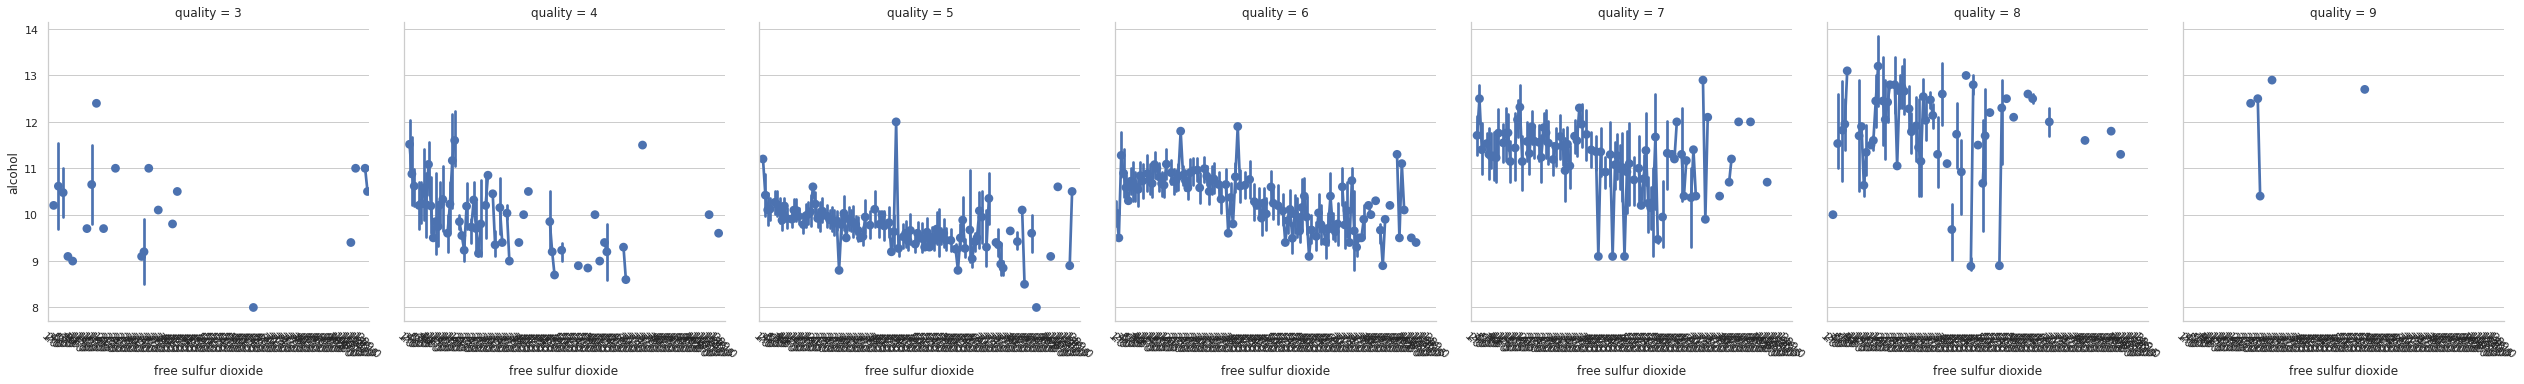

In [35]:
# Factor Plot
g = sns.factorplot(x='free sulfur dioxide', 
                   y='alcohol', 
                   data=df, 
                   # A recent update in Matplotlib broke how the hue argument works in Seaborn with some plots see: https://github.com/mwaskom/seaborn/issues/1697
                   #hue='quality',  # Color by stage
                   col='quality',  # Separate by stage
                   kind='point') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

# Creating Empirical cumulative distribution function (ECDF)


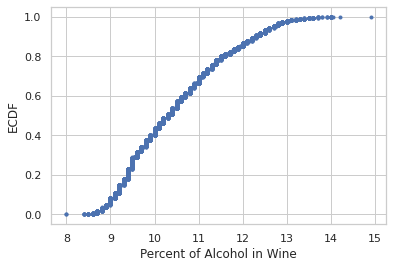

In [36]:
import numpy as np

x = np.sort(df['alcohol'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.05)
_ = plt.xlabel('Percent of Alcohol in Wine') 
_ = plt.ylabel('ECDF') 
plt.grid(True)
plt.show()

In [37]:
print(df["alcohol"].quantile(([0.2, 0.8])))

0.2     9.4
0.8    11.5
Name: alcohol, dtype: float64
